changer le kernel --> python (openmmlab)
s'il n'aparait pas, exécuter dans le terminal :
1. conda activate openmmlab
2. conda install ipykernel
3. python -m ipykernel install --user --name openmmlab --display-name "Python (openmmlab)"

In [2]:
# il faut une version python <= 3.10 sinon incompatible avec mmpose
import sys
print(sys.version)

3.8.20 (default, Oct  3 2024, 10:22:23) 
[Clang 14.0.6 ]


In [5]:
# On définit le chemin vers ton "bon" python
py38 = "/opt/miniconda3/envs/openmmlab/bin/python"

# On installe openmim spécifiquement là-dedans
!{py38} -m pip install openmim

# On force l'installation des briques OpenMMLab
!{py38} -m mim install mmengine
!{py38} -m mim install "mmcv>=2.1.0"
!{py38} -m mim install "mmdet>=3.1.0"
!{py38} -m mim install "mmpose>=1.1.0"

Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.2.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.2.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.2.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.2.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmdet: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment


In [7]:
import mmengine
import mmcv
import mmdet
import mmpose
import torch

print(f"Version de MMCV : {mmcv.__version__}")
print(f"Version de MMPose : {mmpose.__version__}")
print(f"Cuda disponible : {torch.cuda.is_available()}")

Version de MMCV : 2.1.0
Version de MMPose : 1.3.2
Cuda disponible : False
✅ Tout est prêt, tu peux commencer ton projet !


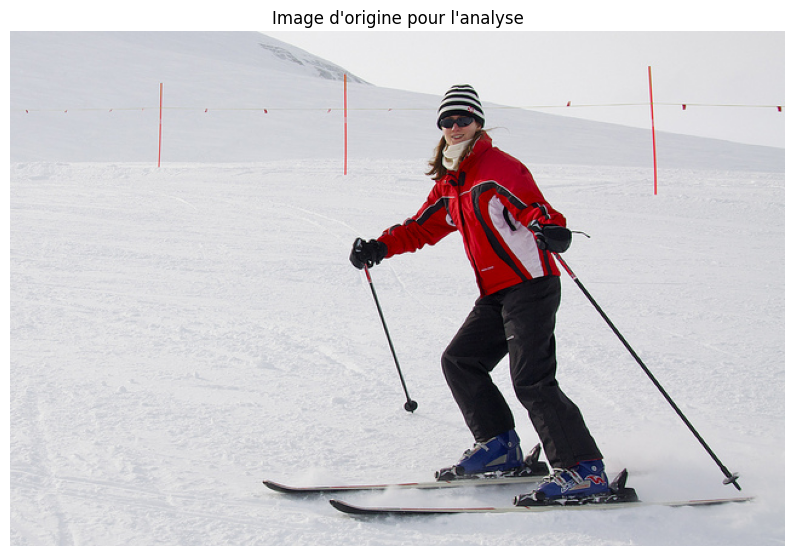

In [8]:
import matplotlib.pyplot as plt
import mmcv

# Chargement de l'image
img_path = 'demo.jpg'
img = mmcv.imread(img_path)
img_rgb = mmcv.bgr2rgb(img) # Conversion pour l'affichage correct des couleurs

# Affichage
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("Image d'origine pour l'analyse")
plt.axis('off') # On enlève les axes
plt.show()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
12/25 18:58:32 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
12/25 18:58:34 - mmengine - INFO - the output image has been saved at vis_results/visualizations/demo.jpg


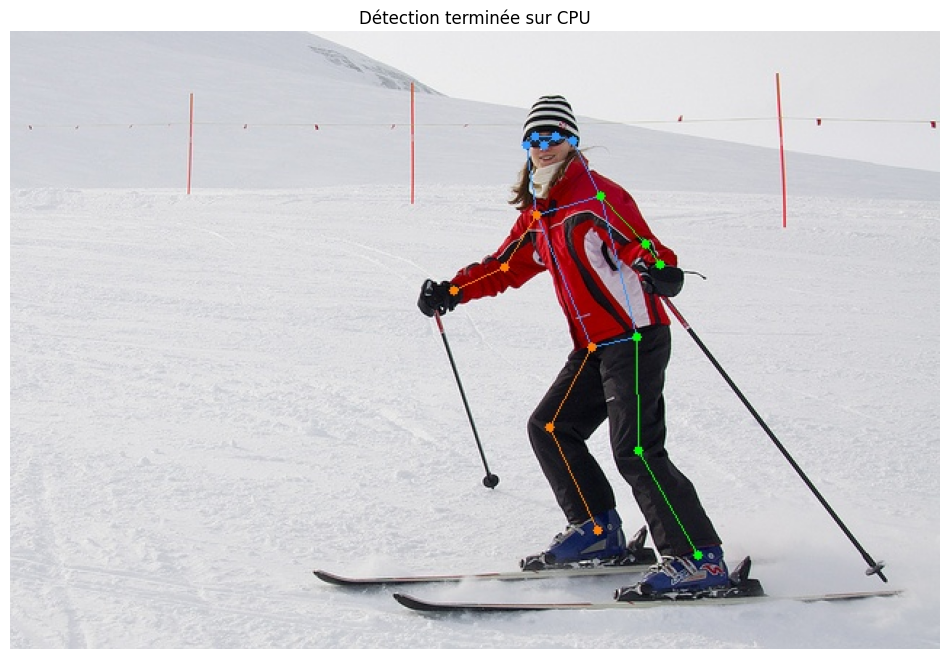

In [12]:
from mmpose.apis import MMPoseInferencer
import matplotlib.pyplot as plt
import mmcv
import os

# 1. On force le device sur 'cpu' pour éviter l'erreur MPS
inferencer = MMPoseInferencer('human', device='cpu')  # enlevez le device = 'cpu' c'est que pour mac

# 2. Le reste du code ne change pas
img_path = 'demo.jpg'
result_generator = inferencer(img_path, vis=True, out_dir='vis_results')
result = next(result_generator)

# 3. Affichage
vis_img_path = os.path.join('vis_results', 'visualizations', os.path.basename(img_path))
vis_img = mmcv.imread(vis_img_path)

plt.figure(figsize=(12, 12))
plt.imshow(mmcv.bgr2rgb(vis_img))
plt.title("Détection terminée sur CPU")
plt.axis('off')
plt.show()

In [16]:
video_path = 'run.mp4' # Remplace par ton fichier

# L'appel reste presque le même
result_generator = inferencer(video_path, vis=True, out_dir='vis_results')

# Pour une vidéo, result_generator va te donner les résultats image par image
# On peut boucler dessus pour traiter toute la vidéo
for frame_result in result_generator:
    # Ici, MMPose enregistre automatiquement les images traitées 
    # dans le dossier vis_results/visualizations/
    pass

print("Traitement de la vidéo terminé !")

12/25 19:21:40 - mmengine - INFO - the output video has been saved at vis_results/visualizations/run.mp4
Traitement de la vidéo terminé !
